In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

import datetime

# **Reading and Understanding Data**

In [2]:
bike_df=pd.read_csv('day.csv')

In [3]:
bike_df.shape

(730, 16)

In [4]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check the head of the dataset
bike_df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# **Cleaning the data**

In [7]:
# Checking null values
bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dropping column instant as it has no effect on target column, and dteday as we have already mnth and weekday columns.
As model targets on cnt column and cnt is sum of casual and registered, we can drop casual and registered columns.

In [8]:
bike_df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [9]:
# Inspecting data after dropping

bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
# Renaming few columns for better readibility
bike_df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)
# Inspecting data after dropping

bike_df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**Converting numerical value into specified categorical value.**

We should map season column as follows:
1. spring
2. summer
3. fall
4. winter

In [11]:
# Encoding/mapping the season column

bike_df.season = bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

Month column is varied between 1 and 12 which are properly defined in data dictionary.

In [12]:
# Encoding/mapping the month column

bike_df.month = bike_df.month.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})


Weekday column is varied between 1 and 6 which are properly defined in data dictionary.

In [13]:
# Encoding/mapping the weekday column

bike_df.weekday = bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


Weather Situation is a Categorical Nomimal Variable where evry number is mapped as follows:

1. Clear, Few clouds, Partly cloudy, Partly cloudy

2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

As per the explanation, we will map each number with a shorter version

1. Clear

2. Mist

3. Light_Snow_Rain

4. Heavy_Rain

In [14]:
# Mapping numerical values of weathersit to specified labels.
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})


In [15]:
bike_df.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
Clear              463
Mist               246
Light_snow_rain     21
Name: weathersit, dtype: int64

We see that, there are no values corersponding to Heavy Rain.

In [16]:
# Inspecting data after renaming

bike_df.head(10)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,jan,0,sat,0,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,jan,0,sun,0,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,jan,0,mon,1,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,jan,0,tue,1,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,jan,0,wed,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


# **Visualising the Data**

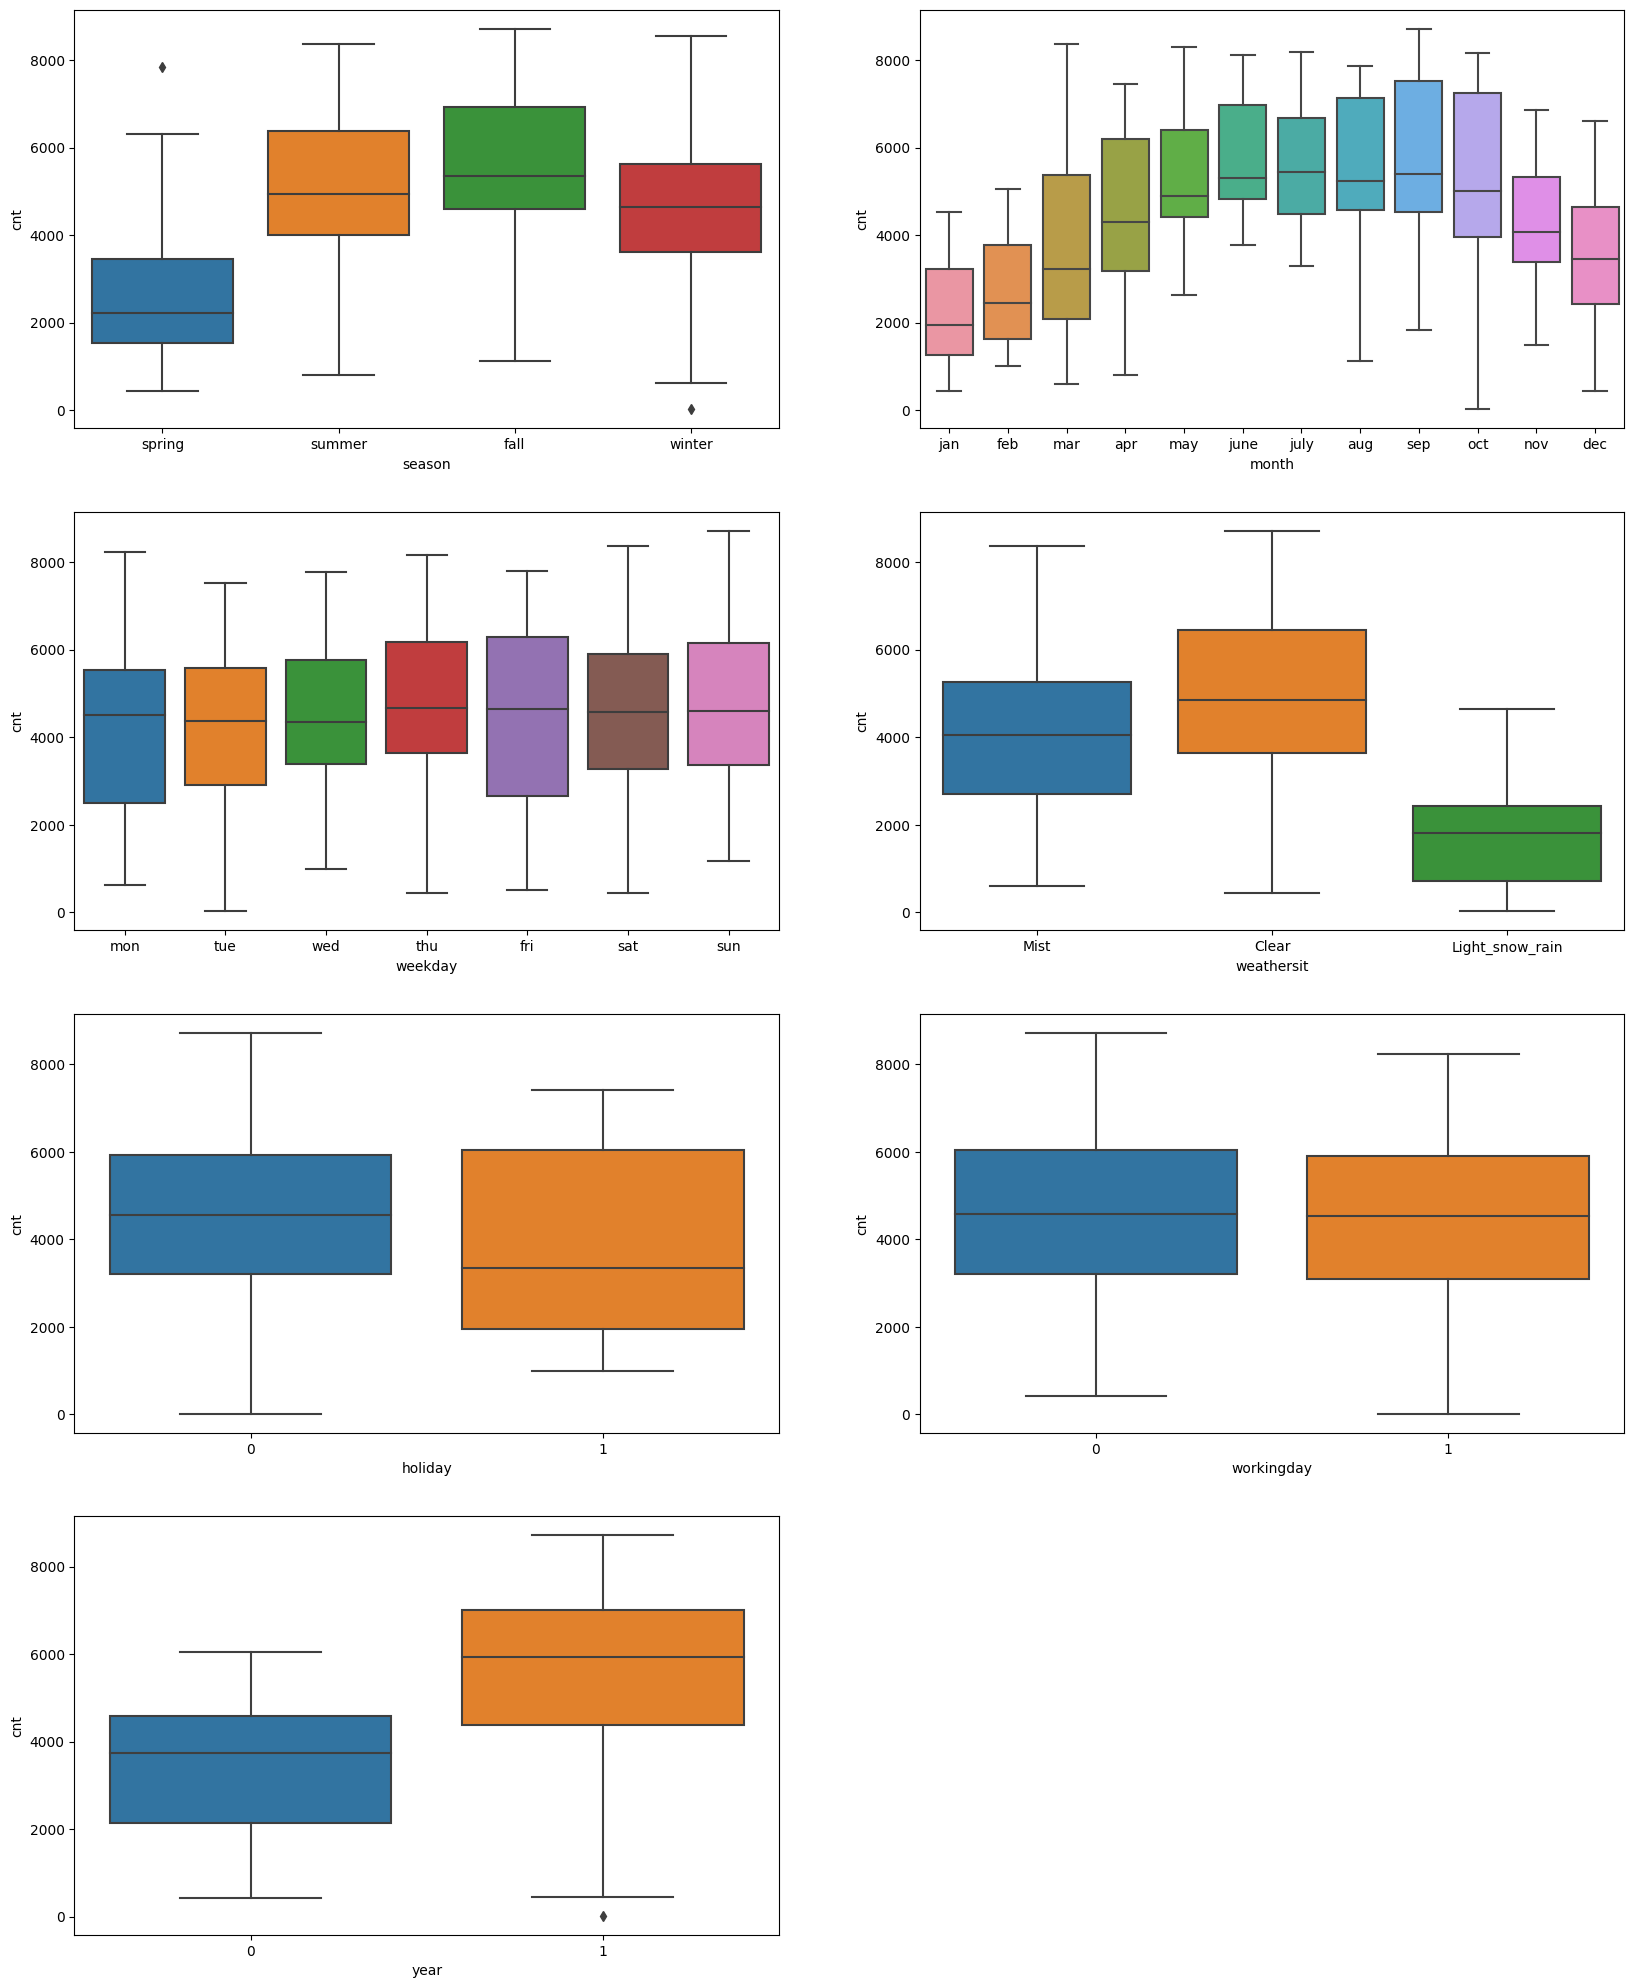

In [17]:
categorical_Cols = bike_df[['season','month','weekday','weathersit','holiday','workingday','year']]
index = 0
plt.figure(figsize=(20, 25))
for i in categorical_Cols:
  index = index +1
  plt.subplot(4,2,index)
  sns.boxplot(x = i, y = 'cnt', data = bike_df)
plt.show()

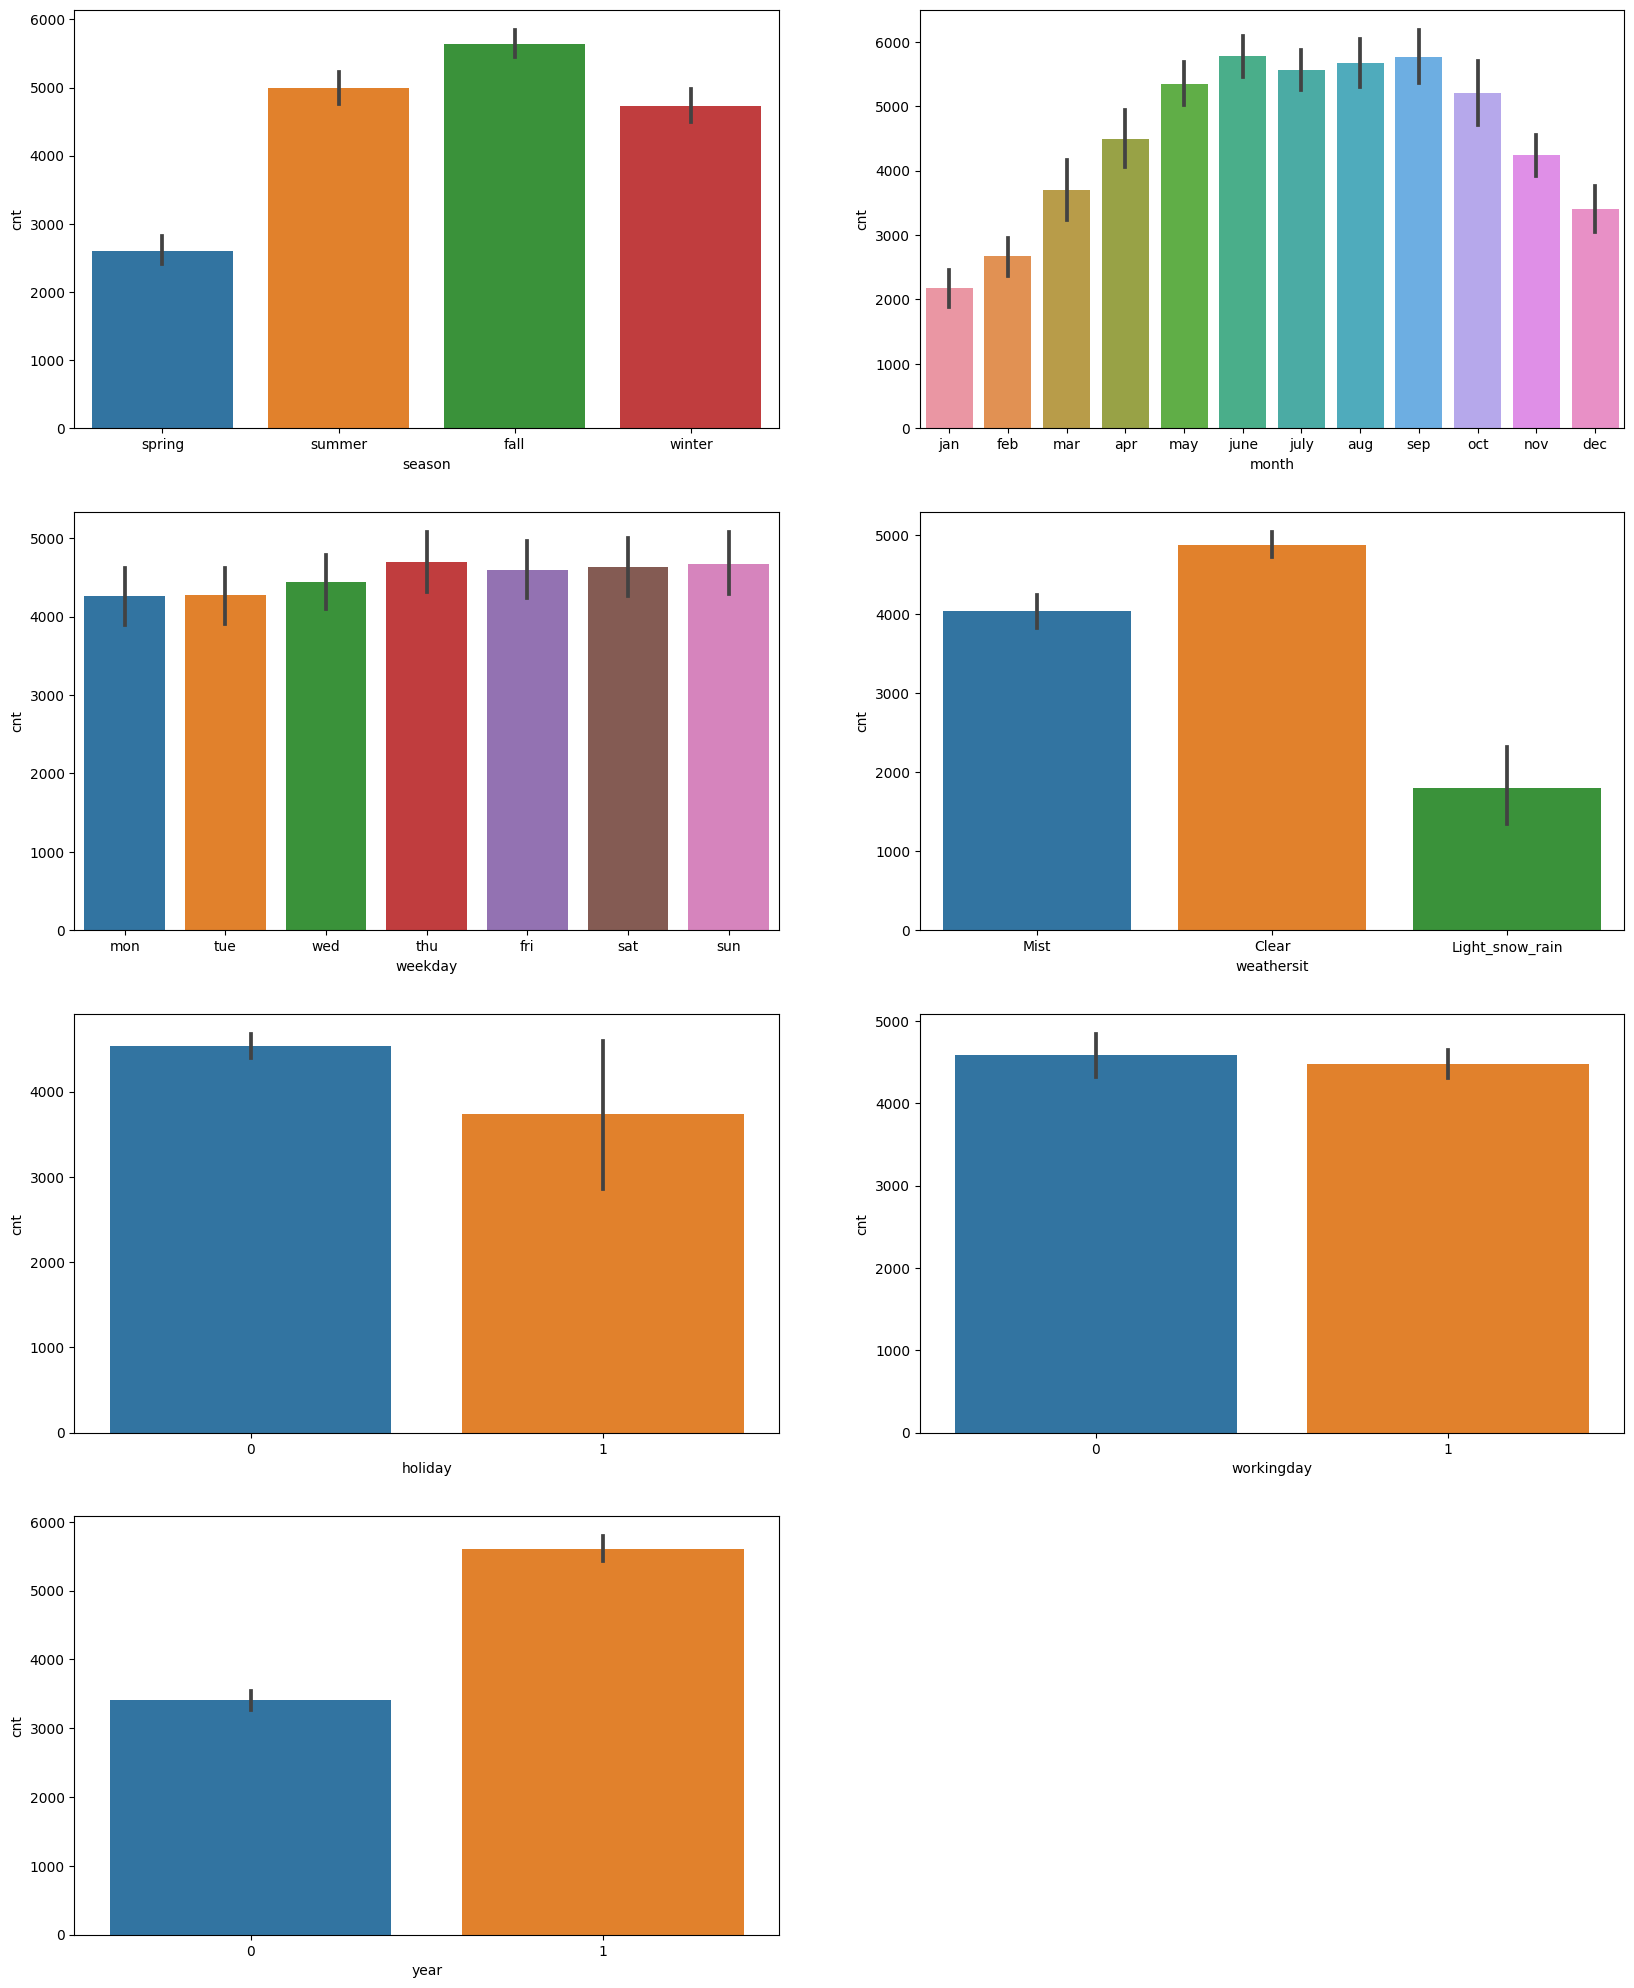

In [18]:
index = 0
plt.figure(figsize=(20, 25))
for i in categorical_Cols:
  index = index +1
  plt.subplot(4,2,index)
  sns.barplot(x = i, y = 'cnt', data = bike_df)
plt.show()

From above plots we can draw many insights such as:

* The plots reveal that fall Season experiences the highest demand for rental bikes, with elevated median values during summer and fall indicating a surge in user numbers during these seasons.


* The number of users shows a gradual rise from January to July, with rental bike demand steadily increasing each month until June.

* September experiences the peak demand, followed by a decline in subsequent months.

* Demand remains relatively stable on weekdays and working days with minimal variation.

* Clear weathersit conditions correspond to the highest demand for rental bikes.

* Demand decreases on holidays.

* The year 2019 shows a significant rise in the number of users.


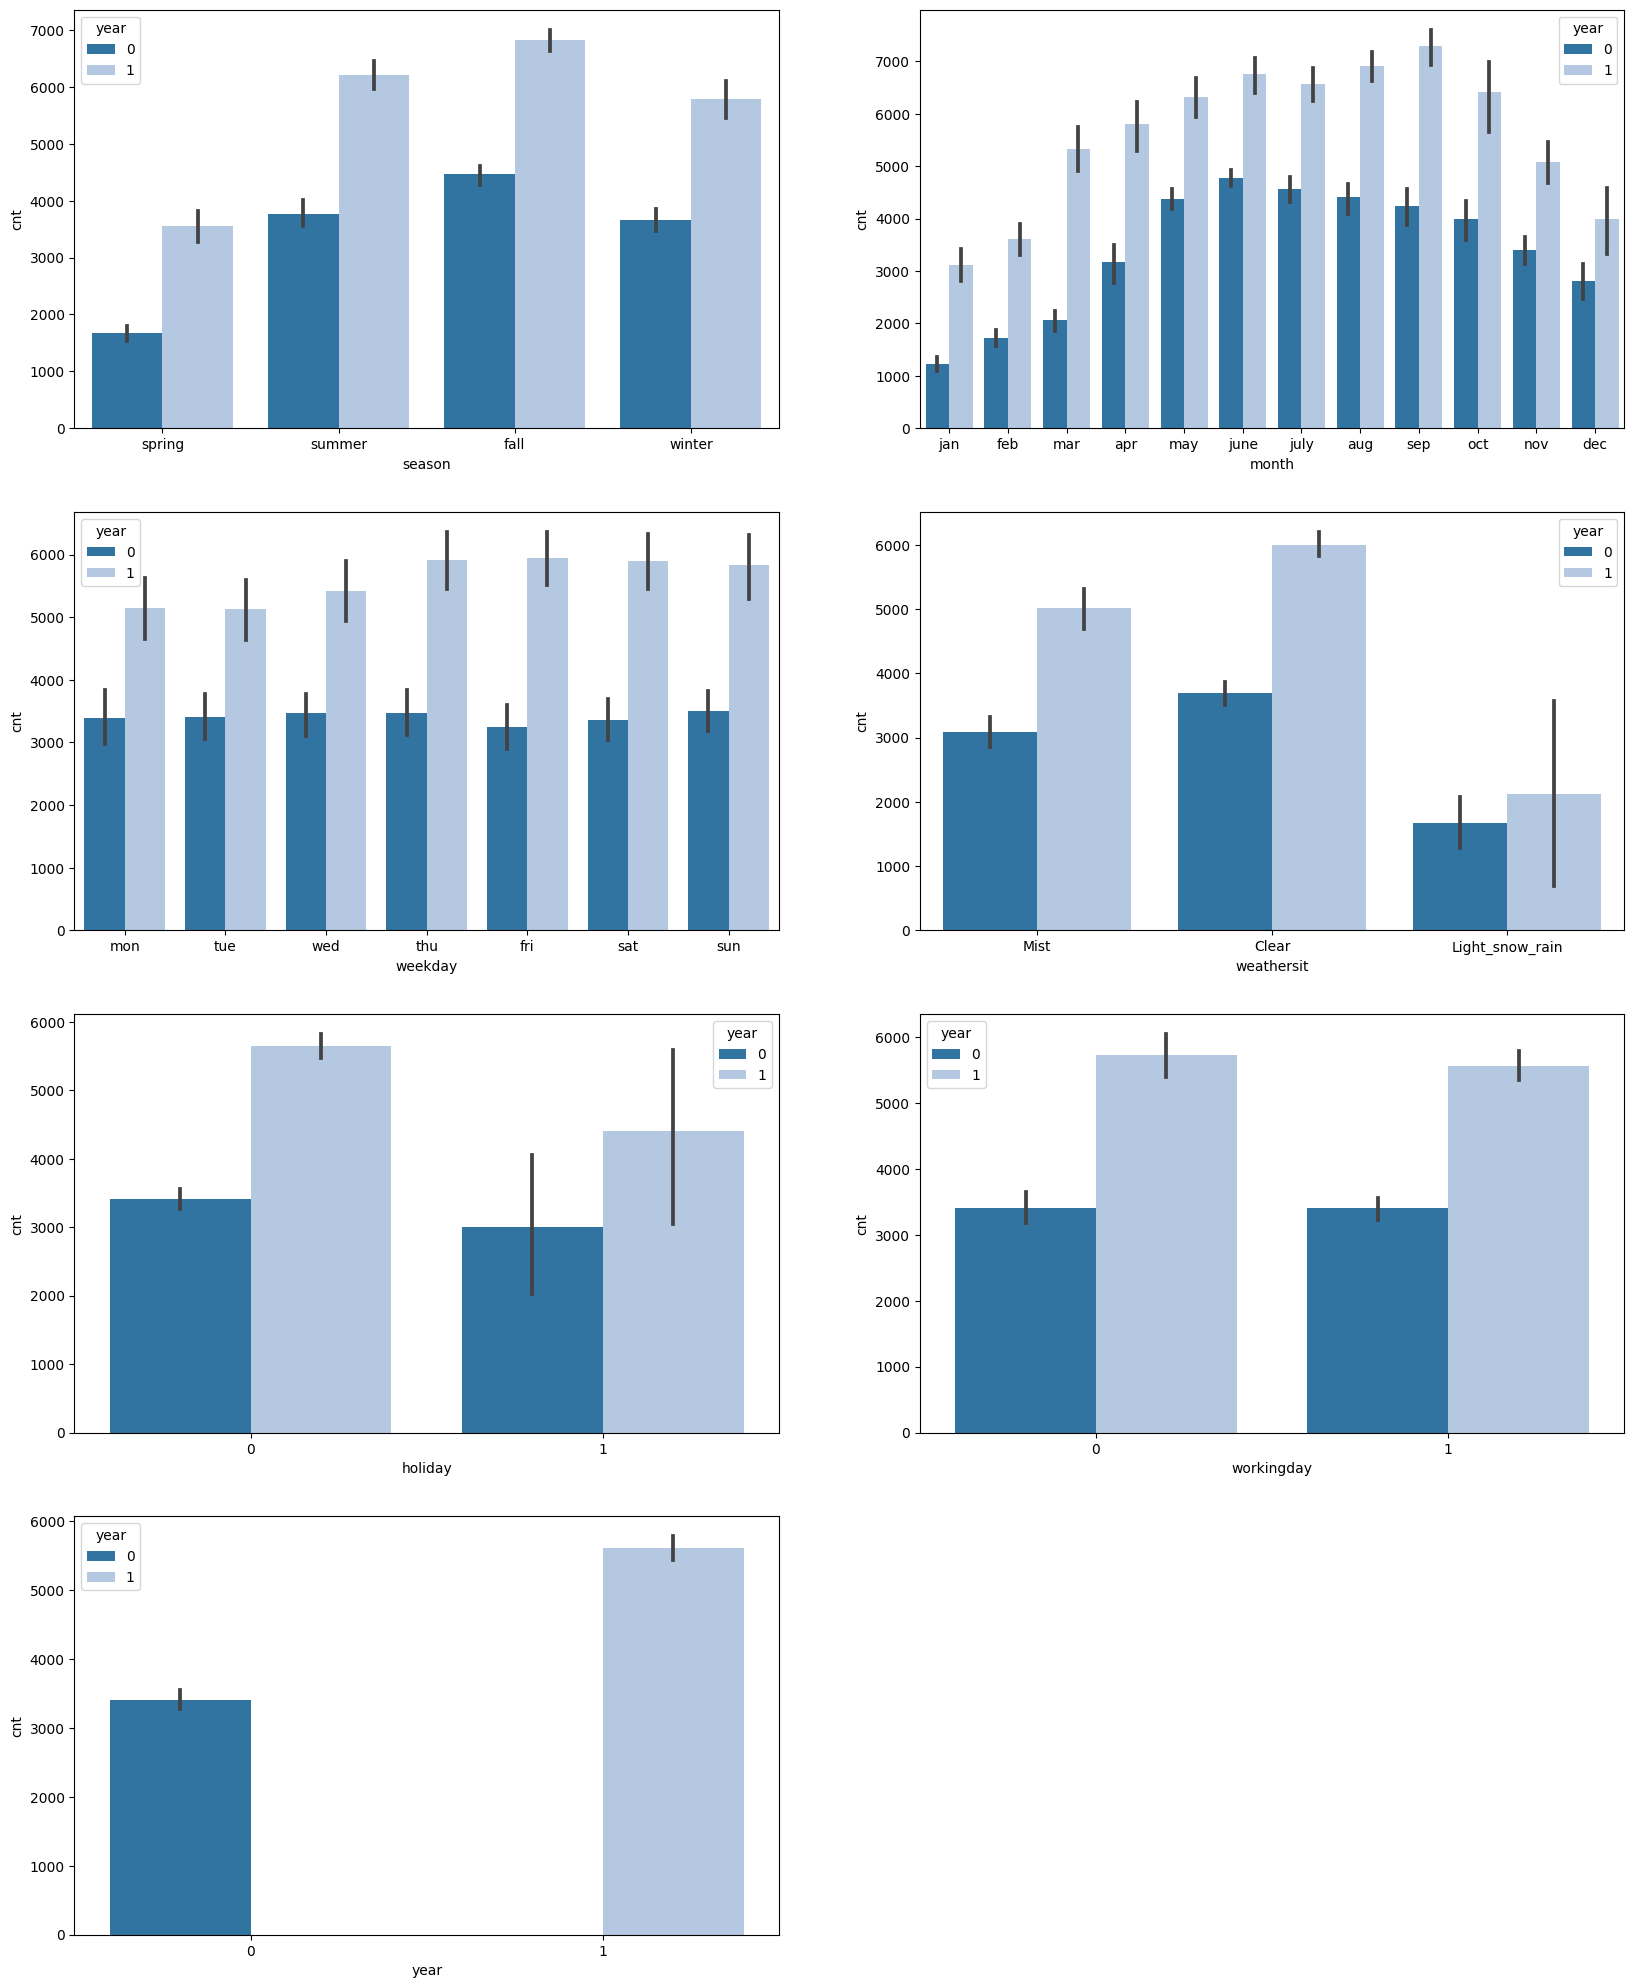

In [19]:
index = 0
plt.figure(figsize=(20, 25))
for i in categorical_Cols:
  index = index +1
  plt.subplot(4,2,index)
  sns.barplot(x=i,y='cnt',data=bike_df, hue='year',palette='tab20')
plt.show()


* The fall season experienced a significant rise in bookings, and across all seasons, there was a noticeable surge in bookings from 2018 to 2019.

* The months of May to October saw the highest booking activity, with a consistent trend of increase from the beginning of the year until mid-year. However, bookings declined towards the end of the year.

* Clear weather conditions naturally attracted more bookings. Interestingly, irrespective of weather situations, there was an increase in bookings in 2019 compared to 2018.

* Bookings were higher on Thursdays, Fridays, Saturdays, and Sundays compared to the early days of the week. On non-holidays, bookings were lower, indicating that people preferred staying home with family on these days.

* The number of bookings remained almost the same between working and non-working days, but there was an overall increase from 2018 to 2019.

* Notably, 2019 showed a substantial growth in bookings compared to the previous year, indicating positive progress in the business.

**Visualising Numeric Variables**


Let's make a pairplot of all the numeric variables

In [20]:
bike_df.corr()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
year,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.027640
temp,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.630685
humidity,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,-0.027640,0.627044,0.630685,-0.098543,-0.235132,1.000000


In [21]:
numericals_col = bike_df[bike_df.columns[~bike_df.columns.isin(categorical_Cols)]]
numericals_col

,temp,atemp,humidity,windspeed,cnt
0,14.110847,18.18125,80.5833,10.749882,985
1,14.902598,17.68695,69.6087,16.652113,801
2,8.050924,9.47025,43.7273,16.636703,1349
3,8.200000,10.60610,59.0435,10.739832,1562
4,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114
726,10.386653,12.75230,59.0000,10.416557,3095
727,10.386653,12.12000,75.2917,8.333661,1341
728,10.489153,11.58500,48.3333,23.500518,1796


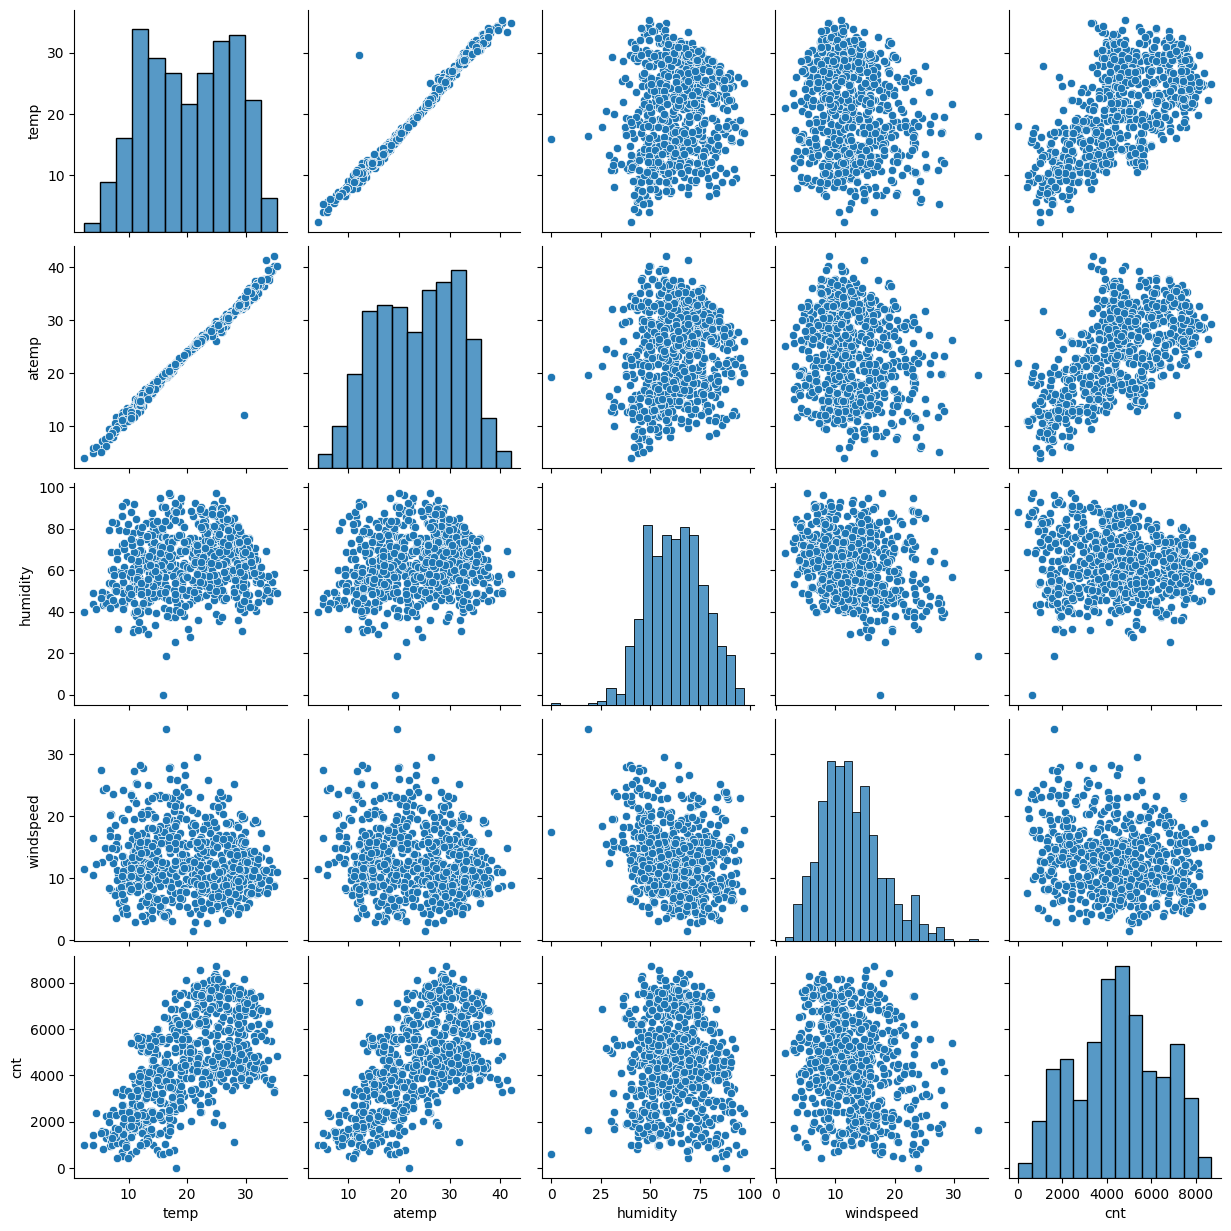

In [22]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=numericals_col)
plt.show()

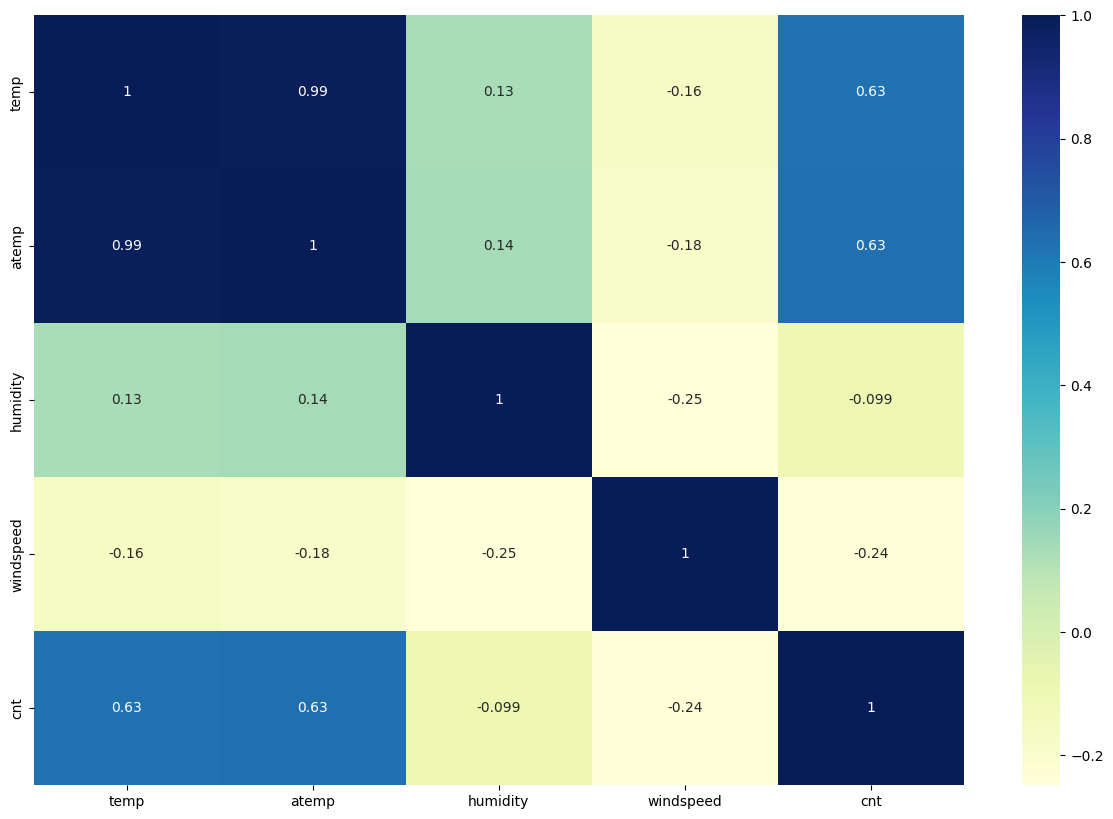

In [23]:
# Checking the correlation between the numerical variables

plt.figure(figsize=(15,10))
sns.heatmap(numericals_col.corr(),cmap="YlGnBu",annot=True)
plt.show()

# **Data Preparation**


In [24]:
# creating dummy values for categorical variables

bike_df = pd.get_dummies(data=bike_df,columns=["season","month","weekday","weathersit"],drop_first=True)
bike_df.columns

Index(['year', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'cnt', 'season_spring', 'season_summer', 'season_winter',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_july',
       'month_june', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')

In [25]:
bike_df

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,1,0,0,0,0,0,1
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0


# **Model Building**

Splitting the Data into Training and Testing Sets

In [26]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
# checking the shape of train dataset
df_train.shape

(510, 30)

In [28]:

# checking the shape of test dataset
df_test.shape

(219, 30)

### Rescaling the Features

In [29]:
df_train

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,19.201653,23.04230,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.14480,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.67460,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.87520,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,32.98605,58.7917,13.916771,6664,0,1,...,0,0,0,0,0,0,1,0,0,1
578,1,0,1,30.852500,35.35440,65.9583,8.666718,7261,0,0,...,0,0,0,0,0,0,0,0,0,0
53,0,0,1,9.091299,12.28585,42.3043,6.305571,1917,1,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,1,10.591653,12.46855,56.0833,16.292189,2739,0,0,...,0,0,1,0,0,0,0,0,0,1


In [30]:
# Let us scale continuous variables
num_vars = ['temp','atemp','humidity','windspeed','cnt']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])


In [31]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [32]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


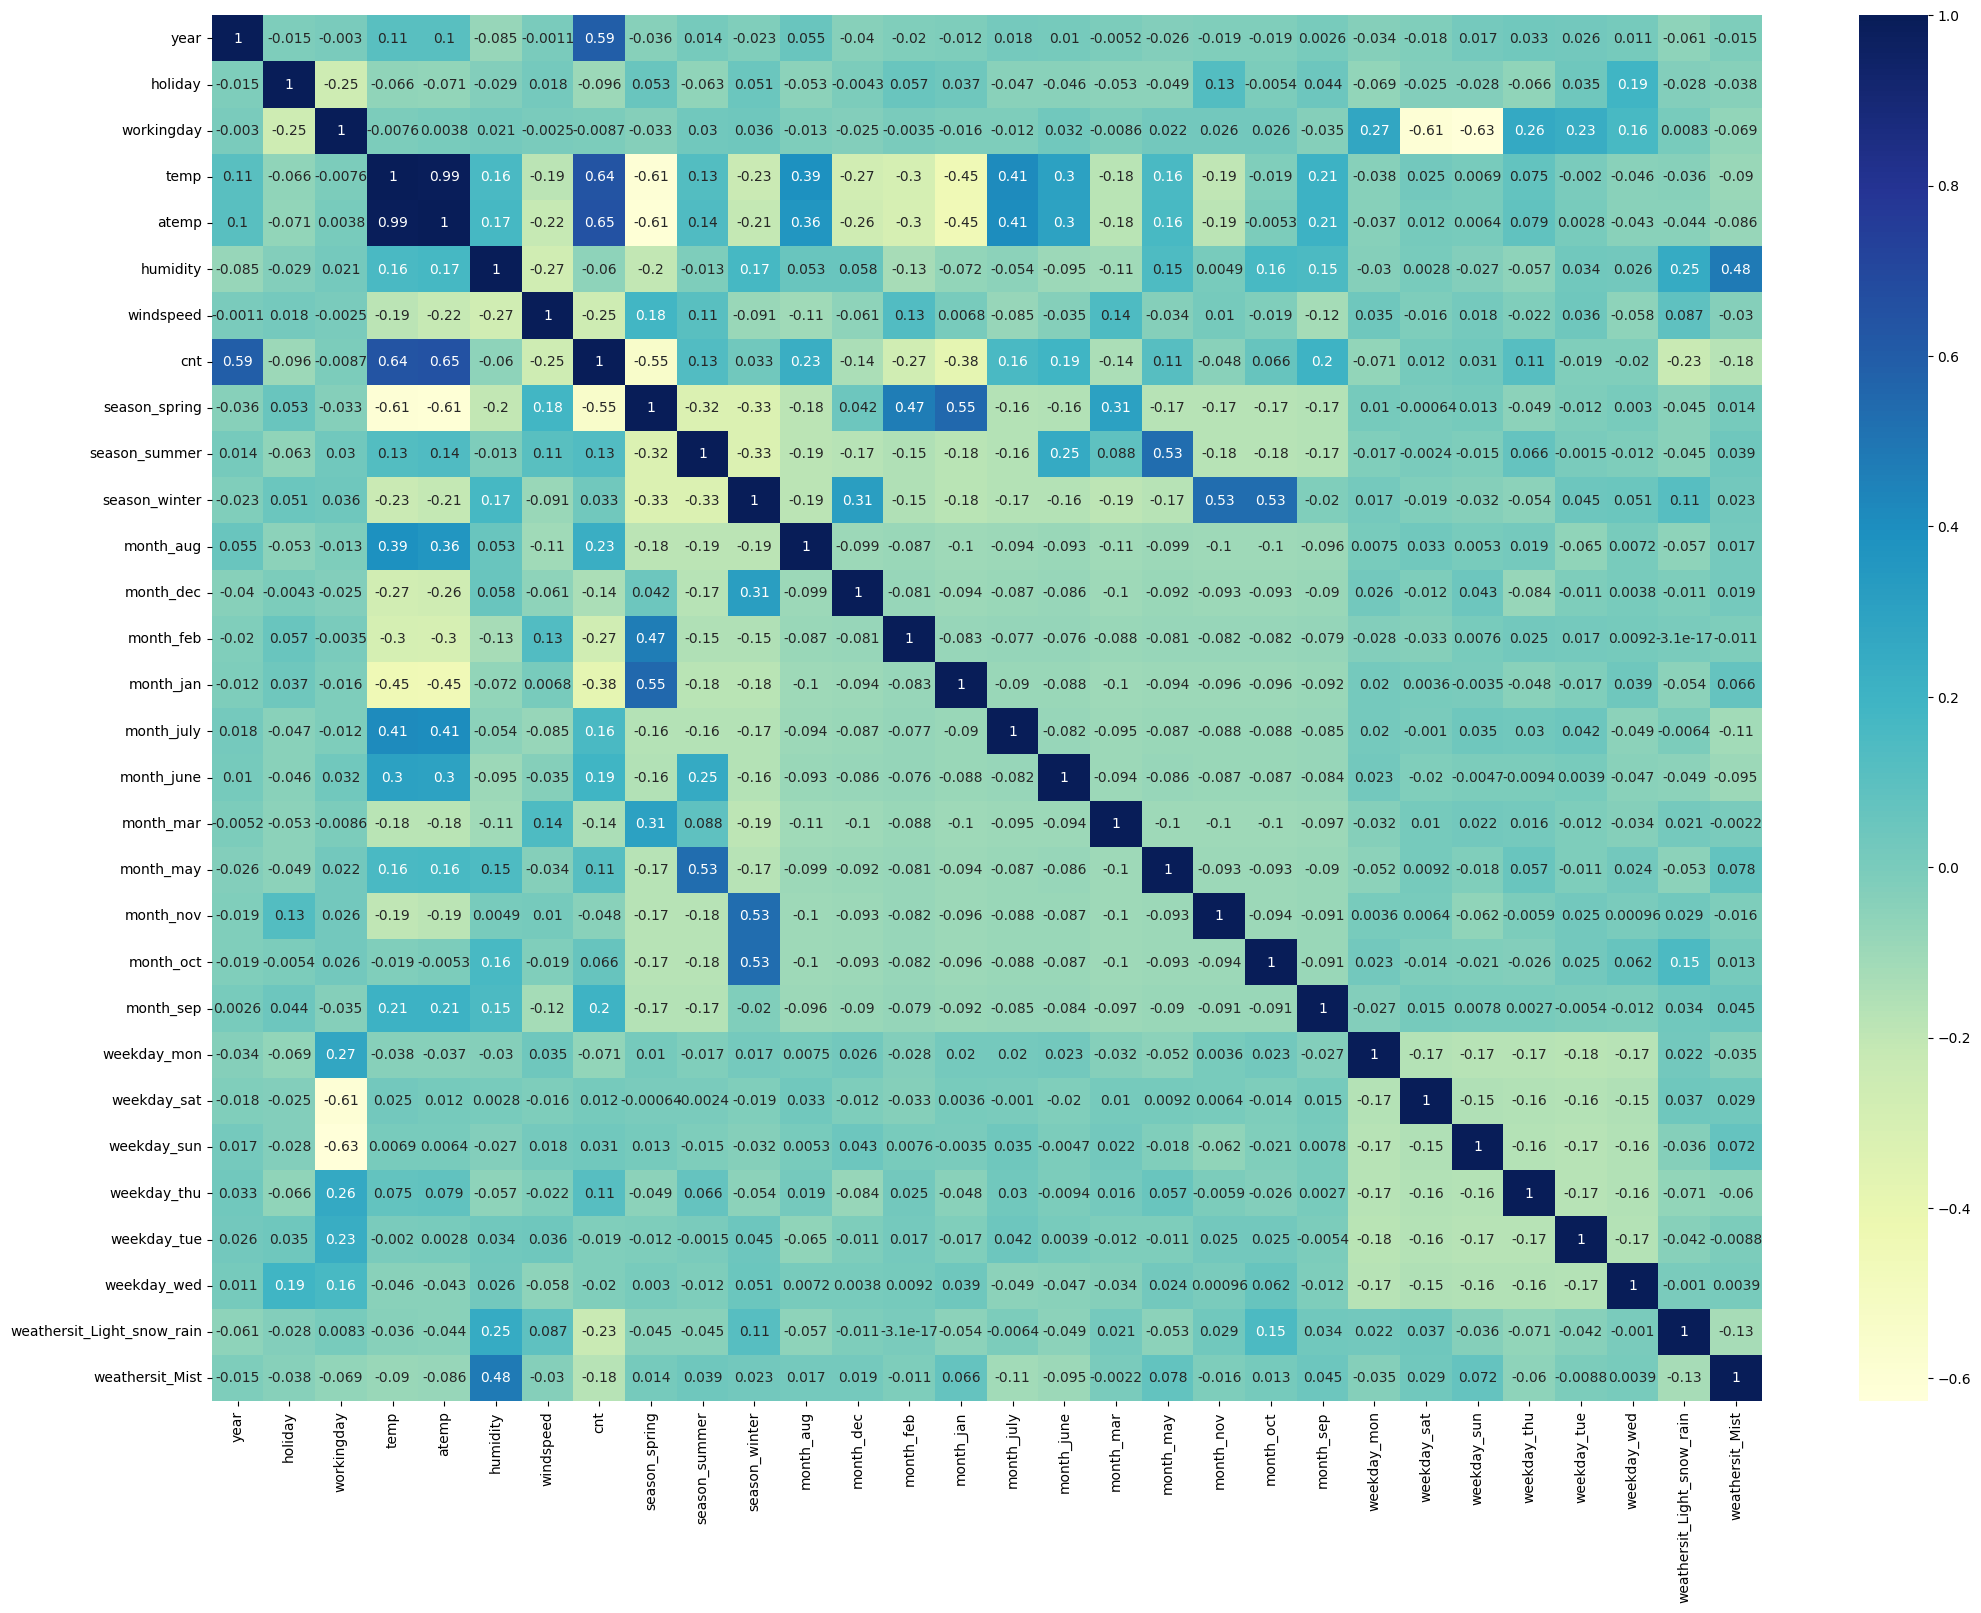

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From this we can say that, year and temp seems correlated with cnt the most. Let's see a regplot for temp vs cnt.

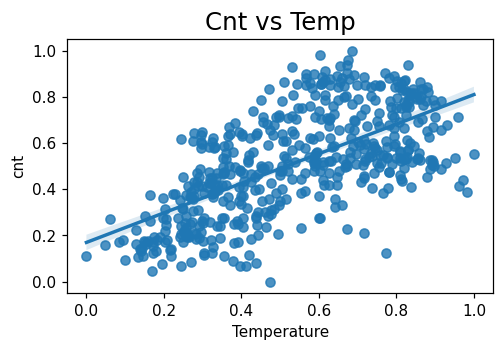

In [34]:
plt.figure(figsize=(5,3),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df_train,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

From above visualization we can say that cnt and temp are having positive correlation.

As can be seen from the map, atemp and temp seems to be correlated to the target variable cnt. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

In [36]:
X_train.shape

(510, 29)

In [37]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 10),
 ('month_dec', True, 1),
 ('month_feb', False, 2),
 ('month_jan', True, 1),
 ('month_july', True, 1),
 ('month_june', False, 14),
 ('month_mar', False, 15),
 ('month_may', False, 7),
 ('month_nov', True, 1),
 ('month_oct', False, 12),
 ('month_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snow_rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'temp', 'humidity', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'month_dec', 'month_jan',
       'month_july', 'month_nov', 'month_sep', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'month_aug', 'month_feb', 'month_june',
       'month_mar', 'month_may', 'month_oct', 'weekday_mon', 'weekday_sat',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [41]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [42]:
# dataframe with RFE selected variables
X_train_rfe = X_train[col]

# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,humidity,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Mist,2.32
0,year,2.09
11,month_nov,1.83
9,month_jan,1.75


humidity shows high VIF value.


### Building linear regression model


In [43]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          3.34e-189
Time:                        12:58:43   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

`humidity` is insignificant in presence of other variables; we can dropped

In [44]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['humidity'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,year,2.07
10,month_nov,1.80
8,month_jan,1.66
9,month_july,1.59
13,weathersit_Mist,1.56


In [45]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.57e-186
Time:                        12:58:43   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

season_summer is insignificant in presence of other variables; we can drop it

In [46]:
# As season_summer shows high P-value values hence we can drop it
X_train_new = X_train_new.drop(['season_summer'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,year,2.06
9,month_nov,1.80
7,month_jan,1.65
12,weathersit_Mist,1.53
6,month_dec,1.46
8,month_july,1.36


In [47]:
# Building 3nd linear regression model

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.08e-186
Time:                        12:58:43   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

month_nov is insignificant in presence of other variables; we can drop it

In [48]:

# As month_nov shows high P value values hence we can drop it
X_train_new = X_train_new.drop(['month_nov'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.36
0,year,2.06
5,season_winter,1.64
7,month_jan,1.64
11,weathersit_Mist,1.53
8,month_july,1.36
6,month_dec,1.29
9,month_sep,1.20


In [49]:
# Building 4th linear regression model

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.4
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          2.02e-186
Time:                        12:58:43   Log-Likelihood:                 499.81
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     497   BIC:                            -918.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

month_dec is insignificant in presence of other variables; we can drop it



In [50]:
# As month_dec shows high P value values hence we can drop it
X_train_new = X_train_new.drop(['month_dec'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.63
3,windspeed,4.00
4,season_spring,2.25
0,year,2.06
6,month_jan,1.60
10,weathersit_Mist,1.53
5,season_winter,1.40
7,month_july,1.36
8,month_sep,1.20
9,weathersit_Light_snow_rain,1.08


In [51]:
# Building 5th linear regression model

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.13e-186
Time:                        12:58:43   Log-Likelihood:                 497.58
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     498   BIC:                            -920.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

month_jan is insignificant in presence of other variables; we can drop it

In [52]:
# As month_jan shows high P value values hence we can drop it
X_train_new = X_train_new.drop(['month_jan'], axis = 1)

# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,year,2.06
4,season_spring,1.65
9,weathersit_Mist,1.51
5,season_winter,1.40
6,month_july,1.35
7,month_sep,1.20
8,weathersit_Light_snow_rain,1.08
1,holiday,1.04


In [53]:
# Building 6th linear regression model

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 31 Oct 2023   Prob (F-statistic):          1.16e-186
Time:                        12:58:43   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [54]:
lr_6.params

const                         0.251899
year                          0.234092
holiday                      -0.098556
temp                          0.451455
windspeed                    -0.139817
season_spring                -0.110795
season_winter                 0.047278
month_july                   -0.072719
month_sep                     0.057705
weathersit_Light_snow_rain   -0.286408
weathersit_Mist              -0.081133
dtype: float64

In [55]:
X_train_lm_6.head()

,const,year,holiday,temp,windspeed,season_spring,season_winter,month_july,month_sep,weathersit_Light_snow_rain,weathersit_Mist
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,1,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,1


### Residual Analysis of the train data

In [56]:
y_train_pred = lr_6.predict(X_train_lm_6)

Text(0.5, 0, 'Errors')

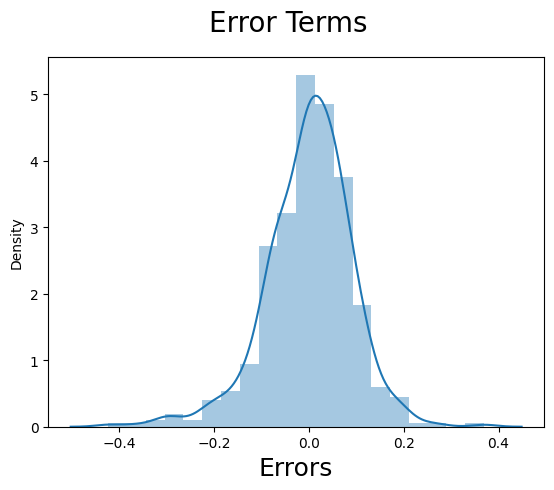

In [57]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading
plt.xlabel('Errors', fontsize = 18)                         # X-label

From above plot we can say that Error terms are normally distributed.

### Homoscedasticity Check

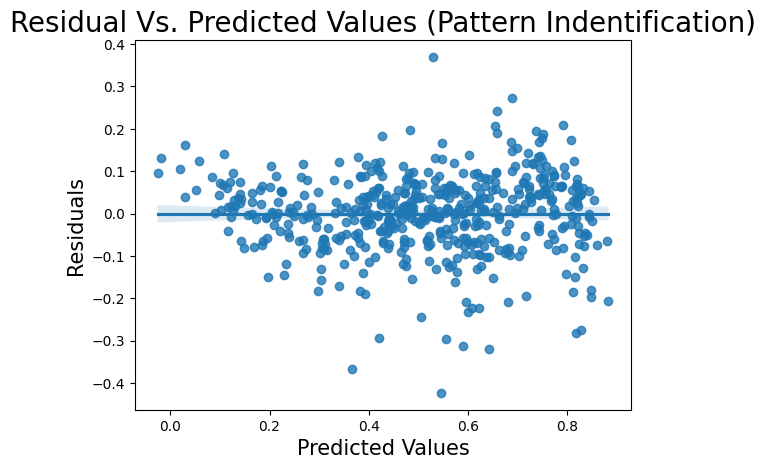

In [58]:
sns.regplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()


From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern.

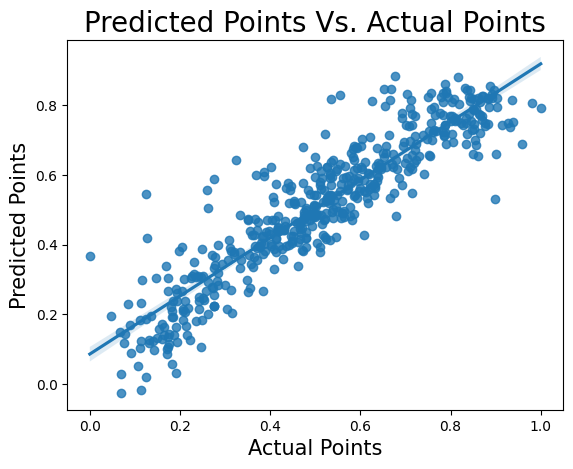

In [59]:
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph, we can say that residuals are equal distributed across predicted value.
This means we see equal variance and we do NOT observe high concentration of data points in certain region & low conecentarion in certain regions.
This prooves Homoscedasticity of Error Terms

### Multi Colinearity

In [60]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,year,2.06
4,season_spring,1.65
9,weathersit_Mist,1.51
5,season_winter,1.40
6,month_july,1.35
7,month_sep,1.20
8,weathersit_Light_snow_rain,1.08
1,holiday,1.04


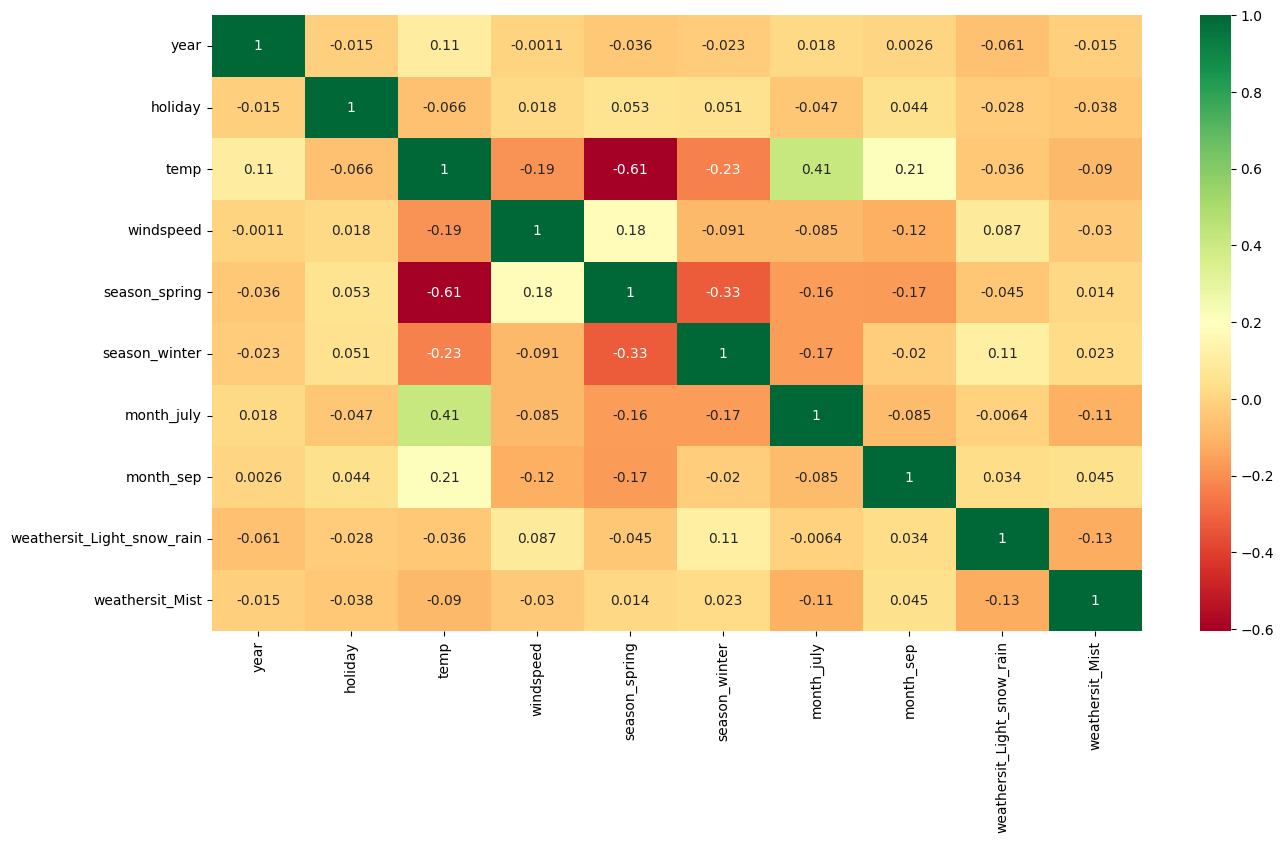

In [61]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap = 'RdYlGn')
plt.show()

VIF values are less than 5 which is good and also there is no multicolinearity as seen from the heatmap.

# **Making Predictions**

### Applying the scaling on the test sets

In [62]:
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [63]:
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [64]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [65]:
y_test = df_test.pop('cnt')
X_test = df_test

In [66]:
col1 = X_train_new.columns

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col1]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test_new)

# Making predictions
y_test_pred = lr_6.predict(X_test_lm)

In [67]:
r2_score(y_test, y_test_pred)

0.8070101019557961

R-Squared score has negligible difference, so we can infer this is the good to go model

# **Model Evaluation**

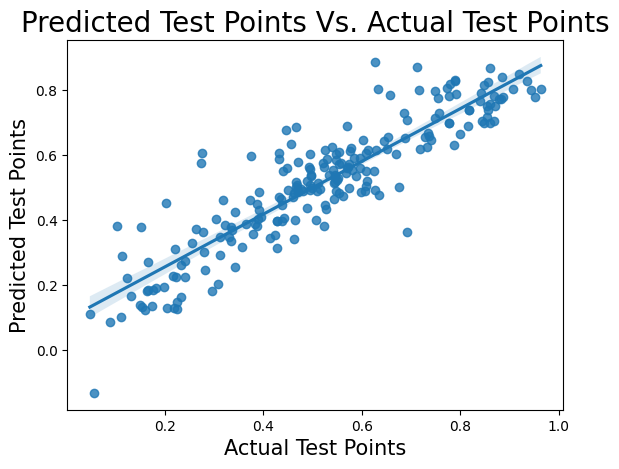

In [68]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [69]:
round(lr_6.params,4)

const                         0.2519
year                          0.2341
holiday                      -0.0986
temp                          0.4515
windspeed                    -0.1398
season_spring                -0.1108
season_winter                 0.0473
month_july                   -0.0727
month_sep                     0.0577
weathersit_Light_snow_rain   -0.2864
weathersit_Mist              -0.0811
dtype: float64

Complete equation:

cnt= 0.2519 + 0.2341(year) -0.0986(holiday) + 0.4515(temp) -0.1398(windspeed) -0.1108(season_spring) + 0.0473(season_winter) -0.0727(month_july)+ 0.0577(month_sep) -0.2864(weathersit_Light_snow_rain) -0.0811(weathersit_Mist)

Significant variables to predict the demand for shared bikes
* year
* holiday
* temp
* windspeed
* Season - (Spring and Winter)
* months(July, September)
* weathersit (Light_snow_rain and Mist)

In [70]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2_score(y_test, y_test_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7774
